<a href="https://colab.research.google.com/github/A-Burnhard/Mall-Customer-Segmentation/blob/main/Mall_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Loading or importing  mall customer segmentation dataset to notebook
mall_data = pd.read_csv("Mall_Customers.csv")
label_encoder = LabelEncoder()
mall_data["Gender"] = label_encoder.fit_transform(mall_data["Gender"])
mall_data.head()

**Preprocessing**


**Identifying Missing values**

In [ ]:
# Identify missing values
missing_values = mall_data.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


**Identifying Duplicates**

In [ ]:
# Identify duplicate rows
duplicates = mall_data.duplicated()
print("Duplicates instances: \n",duplicates)

**Outlier Detection using Boxplot**

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = mall_data

# Visualize the distribution of each feature using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.title('Boxplot of Features')
plt.show()

# Identify outliers using statistical methods (e.g., Z-score or IQR)
# Z-score method
from scipy.stats import zscore

#data = mall_data.drop("class", axis=1)
z_scores = zscore(data)
outlier_threshold = 3  # Adjust the threshold as per your preference
outliers = (abs(z_scores) > outlier_threshold).any(axis=1)

# IQR method
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

# Count the number of outliers
num_outliers = outliers.sum()
print(f"Number of outliers: {num_outliers}")

# Decide whether to remove outliers or transform them
remove_outliers = False

if remove_outliers:
    # Remove outliers from the dataset
    data = data[~outliers]
    print("Outliers removed.")
else:
    # Transform outliers to a specific value
    outlier_value = 200  # Choose an appropriate value for transformation
    data[outliers] = outlier_value
    print("Outliers transformed.")

# Updated visualization after handling outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.title('Boxplot of Features (After Outlier Handling)')
plt.show()

mall_data = data


**others**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


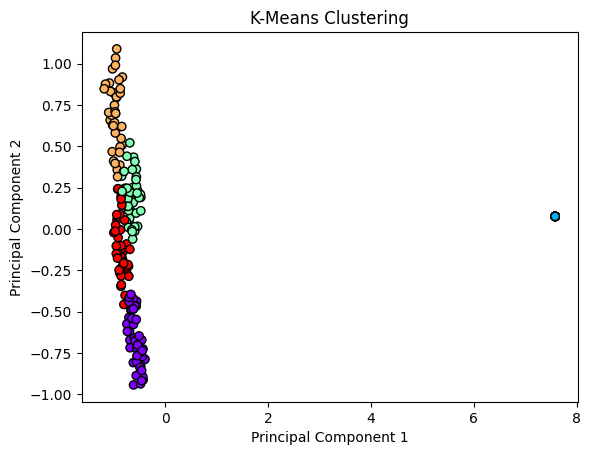

Influential Data Points:
     Gender  Age  Annual Income (k$)  Spending Score (1-100)  Cluster  \
0       200  200               200.0                     200        1   
1       200  200               200.0                     200        1   
2       200  200               200.0                     200        1   
3       200  200               200.0                     200        1   
4       200  200               200.0                     200        1   
5       200  200               200.0                     200        1   
6       200  200               200.0                     200        1   
7       200  200               200.0                     200        1   
124     200  200               200.0                     200        1   
132     200  200               200.0                     200        1   
134     200  200               200.0                     200        1   
138     200  200               200.0                     200        1   
144     200  200          

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.covariance import EllipticEnvelope

# Load the mall customer segmentation dataset
df = mall_data

# Drop irrelevant columns (e.g., CustomerID)
#df.drop(columns=['CustomerID'], inplace=True)

# Standardize the data for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Apply K-Means clustering
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the dataframe
df['Cluster'] = clusters

# Perform PCA for visualization purposes (you can skip this step if the dataset has only 2-3 dimensions)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters for visualization
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='rainbow', edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering')
plt.show()

# Use Elliptic Envelope to detect influential data points
outlier_detector = EllipticEnvelope(contamination=0.05)  # Adjust the contamination level as needed
influential_data_points = outlier_detector.fit_predict(X_scaled)

# Add the influential data point labels to the dataframe
df['Influential'] = influential_data_points

# Display the data points identified as influential
print("Influential Data Points:")
print(df[df['Influential'] == -1])

# Optionally, you can save the updated DataFrame to a new CSV file
# df.to_csv("mall_customer_segmentation_with_influential.csv", index=False)


**Defining X and Y values**

In [ ]:
# Separate the target variable (class) from the features
X = mall_data.drop('class', axis=1)
y = mall_data['class']

# Convert the target variable to numeric labels
label_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
y = y.map(label_mapping)

KeyError: ignored

**Influencial datapoint detection using elliptic envelope**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.covariance import EllipticEnvelope

# Load the mall customer segmentation dataset
df = mall_data

# Drop irrelevant columns (e.g., CustomerID)
#df.drop(columns=['CustomerID'], inplace=True)

# Standardize the data for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Apply K-Means clustering
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the dataframe
df['Cluster'] = clusters

# Perform PCA for visualization purposes (you can skip this step if the dataset has only 2-3 dimensions)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters for visualization
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='rainbow', edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering')
plt.show()

# Use Elliptic Envelope to detect influential data points
outlier_detector = EllipticEnvelope(contamination=0.05)  # Adjust the contamination level as needed
influential_data_points = outlier_detector.fit_predict(X_scaled)

# Add the influential data point labels to the dataframe
df['Influential'] = influential_data_points

# Display the data points identified as influential
print("Influential Data Points:")
print(df[df['Influential'] == -1])

# Optionally, you can save the updated DataFrame to a new CSV file
# df.to_csv("mall_customer_segmentation_with_influential.csv", index=False)


**Normality of the set of features using shapiro**

Feature: Gender
Shapiro-Wilk test statistic: 0.32796400785446167
P-value: 1.4623176229840116e-26
The feature is not normally distributed.


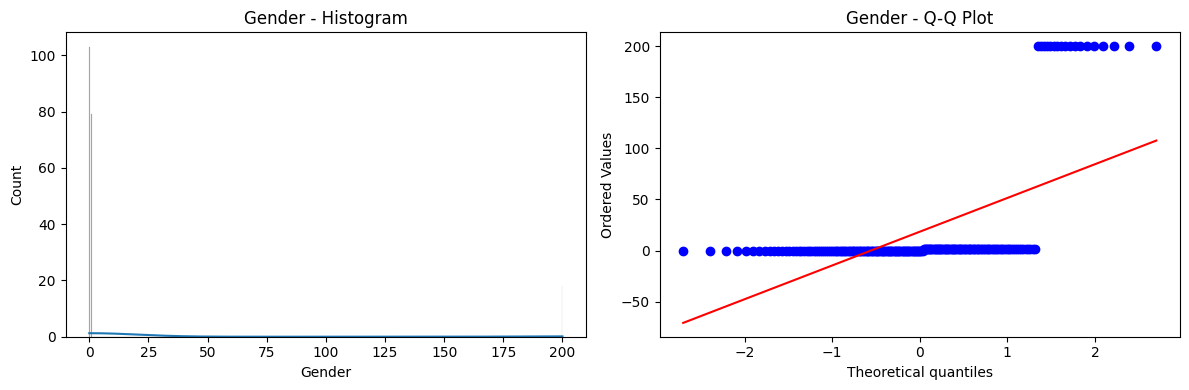

Feature: Age
Shapiro-Wilk test statistic: 0.581739068031311
P-value: 9.4720359047187e-22
The feature is not normally distributed.


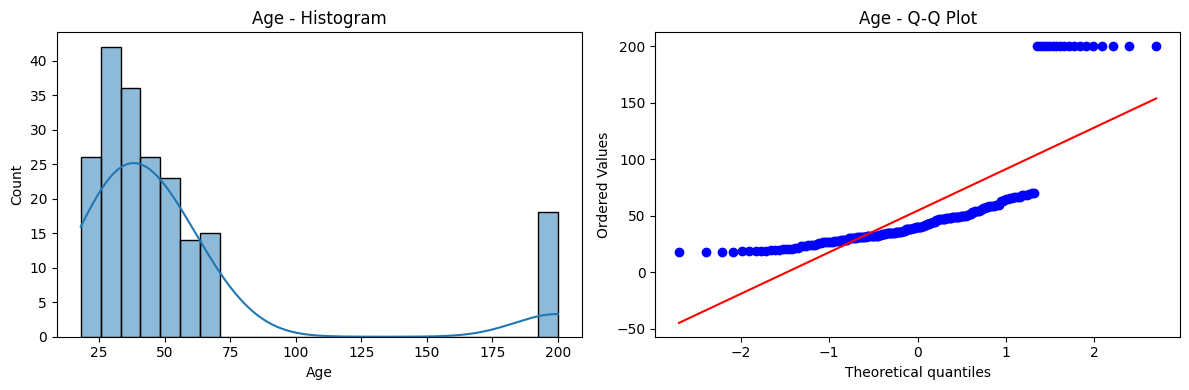

Feature: Annual Income (k$)
Shapiro-Wilk test statistic: 0.32883137464523315
P-value: 1.509545431154671e-26
The feature is not normally distributed.


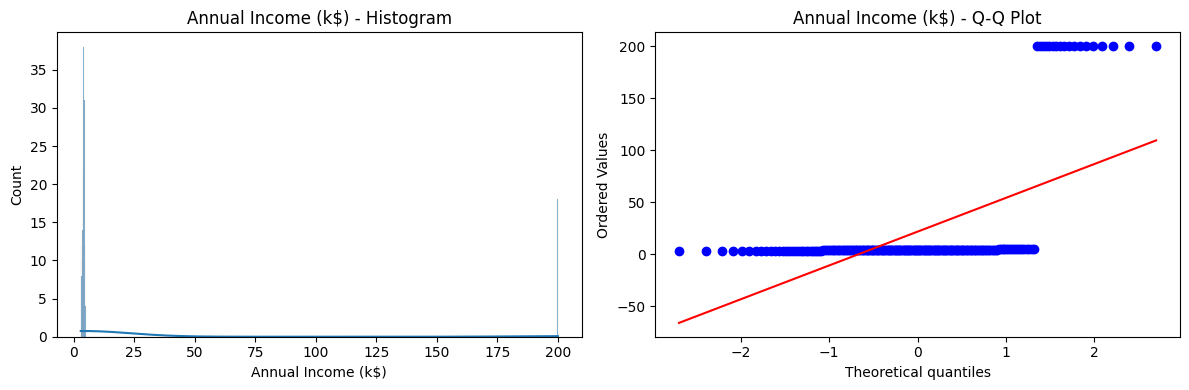

Feature: Spending Score (1-100)
Shapiro-Wilk test statistic: 0.7853497266769409
P-value: 7.571043062772585e-16
The feature is not normally distributed.


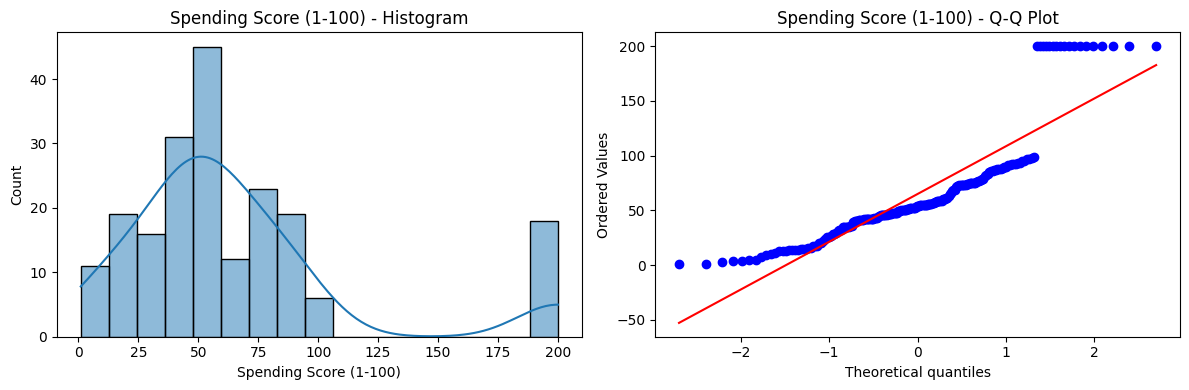

Feature: Cluster
Shapiro-Wilk test statistic: 0.8672776222229004
P-value: 3.218079882433278e-12
The feature is not normally distributed.


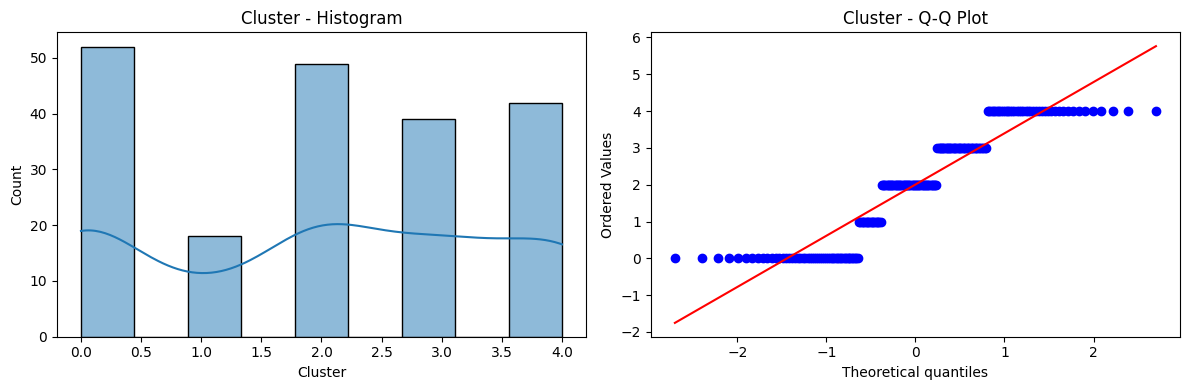

Feature: Influential
Shapiro-Wilk test statistic: 0.32186460494995117
P-value: 1.1705687416560934e-26
The feature is not normally distributed.


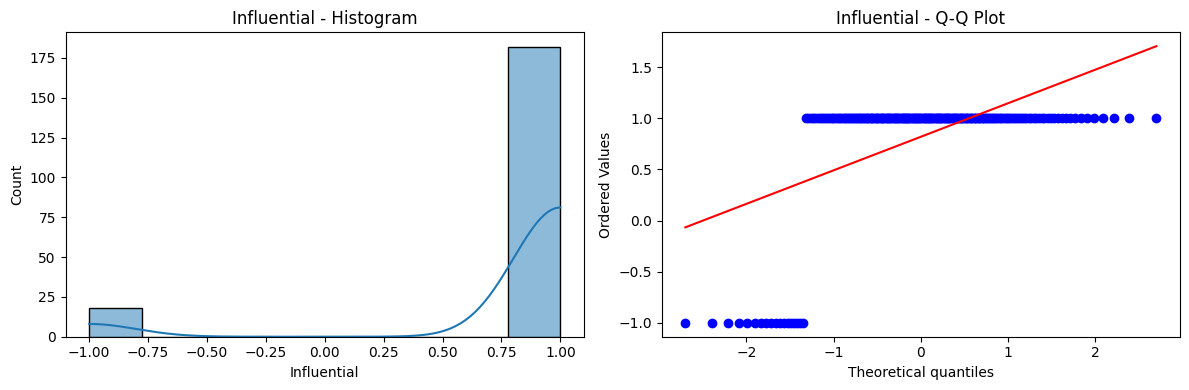

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the Mall Customer Segmentation dataset
df = mall_data

# List of numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns

# Check the normality of each numerical feature
for feature in numerical_features:
    # Shapiro-Wilk test for normality
    stat, p = stats.shapiro(df[feature])
    alpha = 0.05

    print(f"Feature: {feature}")
    print(f"Shapiro-Wilk test statistic: {stat}")
    print(f"P-value: {p}")

    if p > alpha:
        print("The feature is normally distributed.")
    else:
        print("The feature is not normally distributed.")

    # Visualize the distribution using a histogram and Q-Q plot
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} - Histogram")

    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], plot=plt)
    plt.title(f"{feature} - Q-Q Plot")

    plt.tight_layout()
    plt.show()


**Data transformation**

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
X,y

# Separate the target variable (class) from the features

# Perform normalization using Min-Max scaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Perform standardization using StandardScaler
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
print(X)

**Feature Selection**

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor


# Create a Random Forest regressor
rf = RandomForestRegressor()

# Fit the Random Forest model
rf.fit(X, y)

# Get the feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame of feature importances
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance (descending order)
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feature_importances_df)

**Oversampling techniques using the Synthetic Minority Over-sampling Technique (SMOTE) to balance the imbalanced dataset**

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE


# Create a SMOTE object
smote = SMOTE()

# Perform oversampling
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print the balanced class distribution
print("Class distribution after SMOTE:")
print(y_resampled.value_counts())


**Selecting Appropriate Learners for Training and Validation (K means and agglomerative clustering)**

**K-Means clustering with K-fold cross-validation**

In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Instantiate the KMeans model
kmeans = KMeans(n_clusters=3)

# Perform K-fold cross-validation
k_fold_scores = cross_val_score(kmeans, X, cv=5)

# Print the cross-validation scores
print("K-Fold Cross-Validation Scores for K-Means:")
print(k_fold_scores)



**Hierachical clustering using agglomerative clusutering**

In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import LeaveOneOut

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Instantiate the AgglomerativeClustering model
agg_clustering = AgglomerativeClustering(n_clusters=3)

# Perform leave-one-out cross-validation
loo = LeaveOneOut()
validation_scores = []

for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_pred = agg_clustering.fit_predict(X_train)
    validation_scores.append(y_pred[test_index][0])

# Print the validation scores
print("Leave-One-Out Cross-Validation Scores for Hierarchical Clustering:")
print(validation_scores)
